In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Step2: load the netflix dataset

In [2]:
df=pd.read_csv('C:\\Users\\hitha\\Desktop\\Netflix- data- analysis\\Netflix_titles.csv.zip')


step3:view the first rows

In [3]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


step4: get dataset information

In [4]:
df.shape


(8807, 12)

In [5]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


step5:check for missing values

In [7]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


step6:Filling missing values

In [8]:
df['date_added']=df['date_added'].fillna('Not Available')
df['rating']=df['rating'].fillna('not Rated')
df['duration']=df['duration'].fillna('unknown')
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


step7:counts how many entries

In [9]:
print(df['type'].value_counts())
print(df['rating'].value_counts())
print(df['country'].value_counts().head(10))

Movie      6131
TV Show    2676
Name: type, dtype: int64
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


step8:convert date _added to date format

In [10]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [11]:
print(df['date_added'].dtype)

datetime64[ns]


In [12]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [13]:
df[['duration_int','duration_type']]=df['duration'].str.extract(r'(\d+)\s*(\d+)')
df['duration_int']=pd.to_numeric(df['duration_int'],errors='coerce')

step9:Analyze movies and tvshows by type and duration

In [14]:
print(df['type'].value_counts())
df_movies=df[df['type']=='movie']
print(df_movies['duration_int'].describe())
df_shows=df[df['type']=='tv show']
print(df_shows['duration_int'].value_counts().head())

Movie      6131
TV Show    2676
Name: type, dtype: int64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: duration_int, dtype: float64
Series([], Name: duration_int, dtype: int64)


step10:Visualize the number of movies and Tv shows on netflix

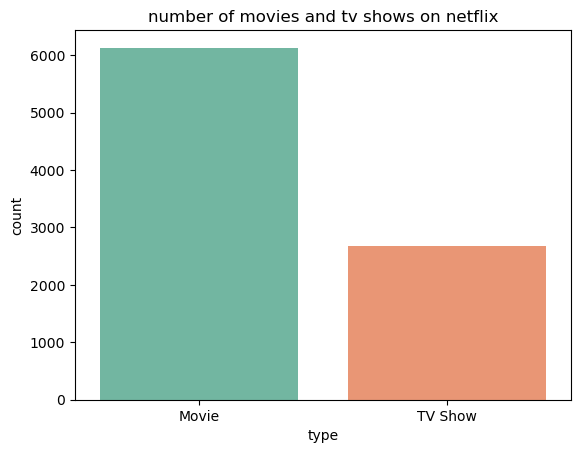

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('number of movies and tv shows on netflix')
sns.countplot(data=df,x='type',palette='Set2')
plt.show()

step11:Visualize top 10 countries with netflix titles

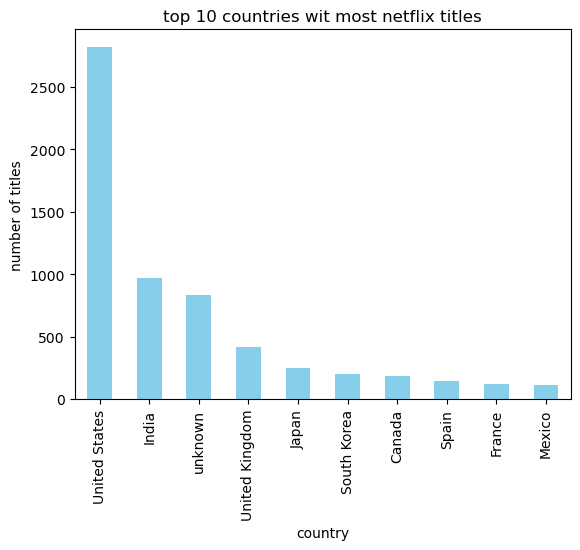

In [16]:
df['country']=df['country'].fillna('unknown')
country_counts=df['country'].value_counts().head(10)
country_counts.plot(kind='bar',color='skyblue')
plt.title('top 10 countries wit most netflix titles')
plt.xlabel('country')
plt.ylabel('number of titles')
plt.show()

step12:Analyse data added per year

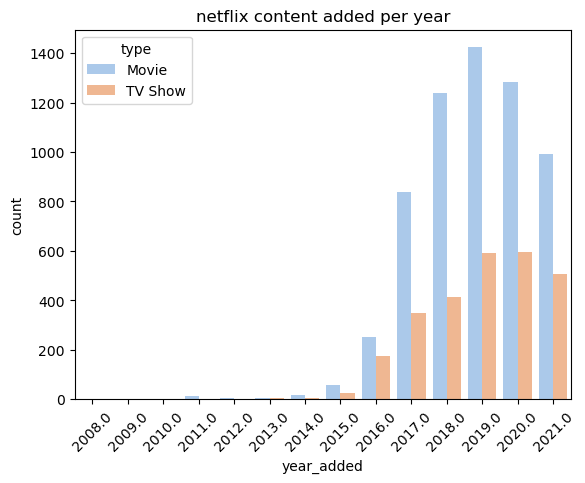

In [17]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['year_added']=df['date_added'].dt.year
sns.countplot(data=df,x='year_added',hue='type',palette='pastel')
plt.title('netflix content added per year')
plt.xticks(rotation=45)
plt.show()


step13:top 10 genres in netflix

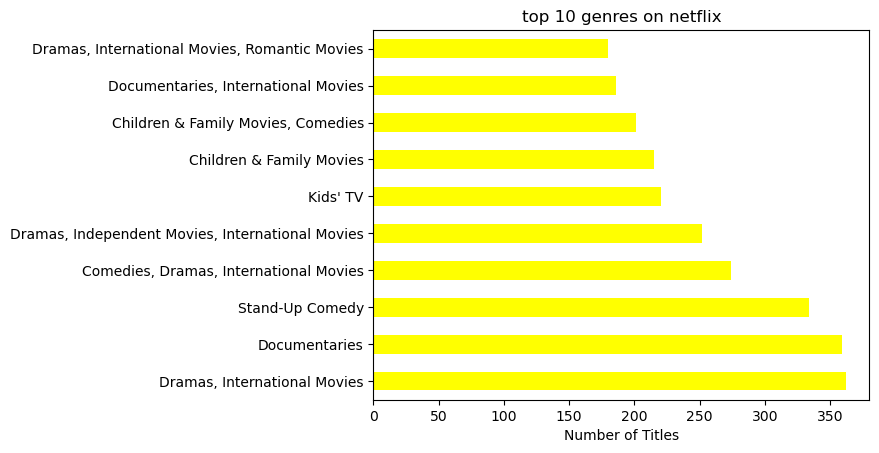

In [24]:
top_genres=df['listed_in'].value_counts().head(10)
top_genres.plot(kind='barh',color='yellow')
plt.title('top 10 genres on netflix')
plt.xlabel('Number of Titles')
plt.show()

Step14:Analyze content Added Per Year

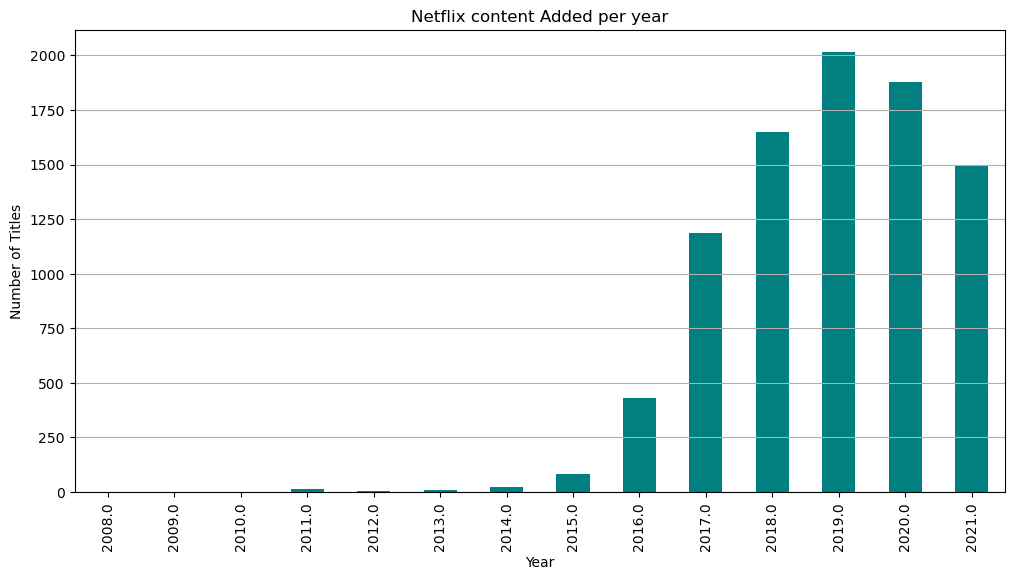

In [25]:
df['year_added']=df['date_added'].dt.year
content_per_year=df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,6))
content_per_year.plot(kind='bar',color='teal')
plt.title('Netflix content Added per year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()

 Step15:Top 10countries with Most content

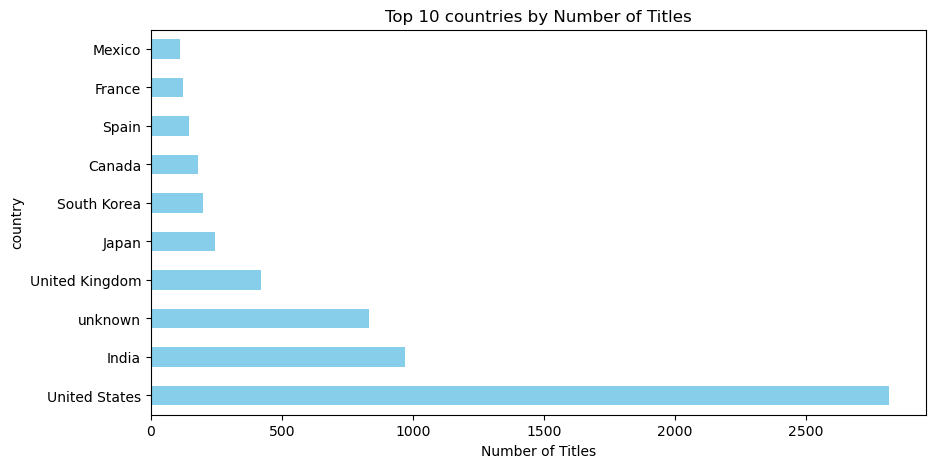

In [26]:
Top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
Top_countries.plot(kind='barh',color='skyblue')
plt.title('Top 10 countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('country')
plt.show()

Step16:Most frequent Directors

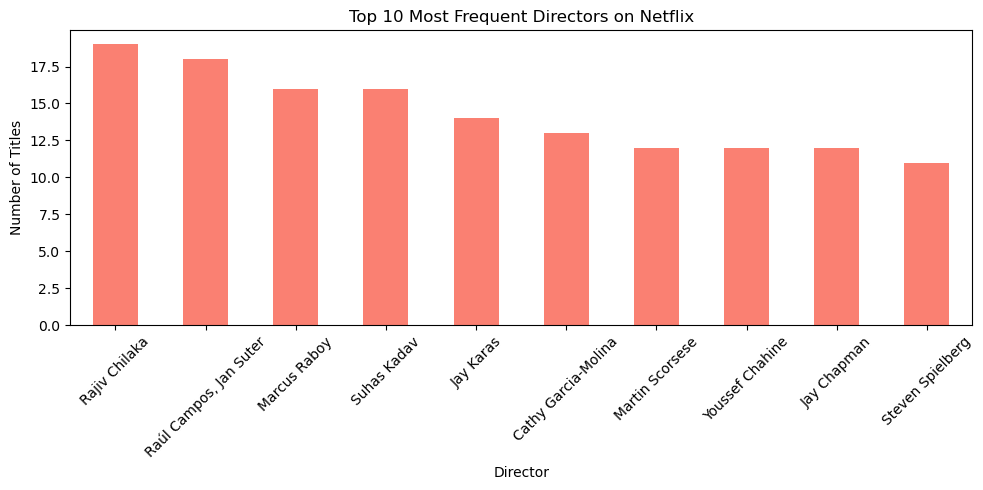

In [27]:
Top_directors=df['director'].value_counts().drop('Not Available',errors='ignore').head(10)
plt.figure(figsize=(10,5))
Top_directors.plot(kind='bar',color='salmon')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step17:Content Type Distribution by year(Movies vs Tv Show)

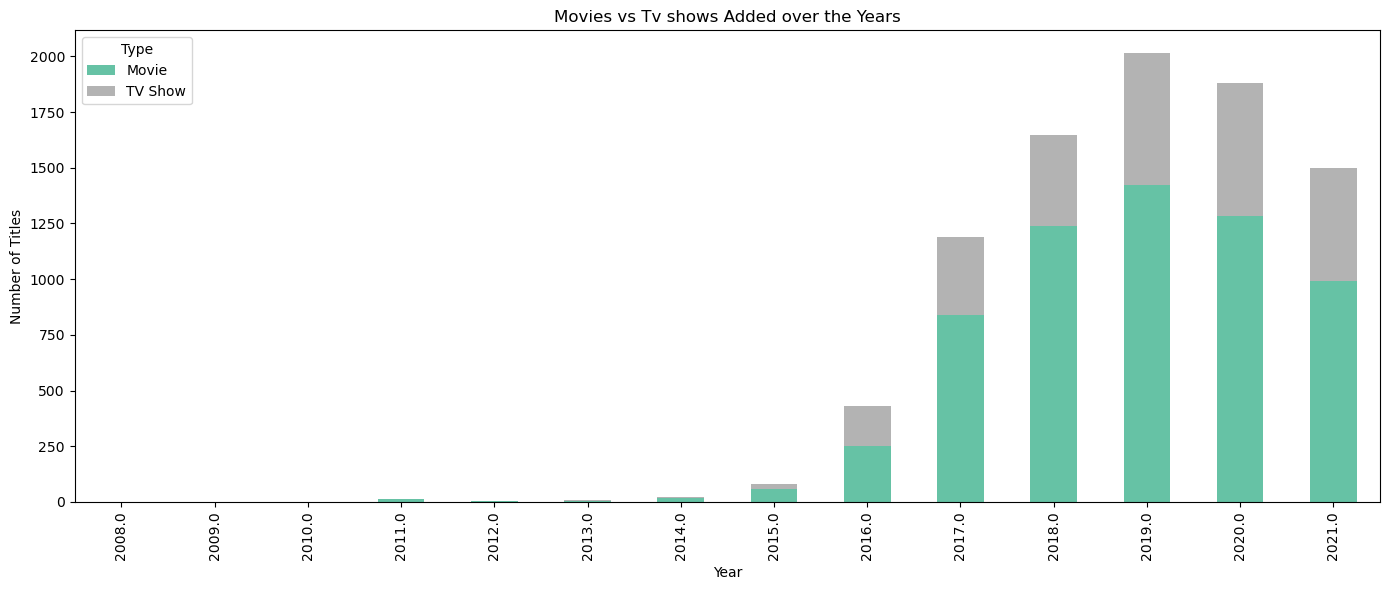

In [22]:

type_by_year=df.groupby(['year_added','type']).size().unstack()
type_by_year.plot(kind='bar',stacked=True,figsize=(14,6),colormap='Set2')
plt.title('Movies vs Tv shows Added over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Step18:Most common Duration for Movies and Tv shows 

In [23]:
df['duration_int']=df['duration'].str.extract('(\d+)').astype(float)
df['duration_int']=df['duration'].str.extract('([a-zA-Z]+)')

df_movies=df[df['type']=='Movie']
print("Movie Duration stats:")
print(df_movies['duration_int'].describe())

df_tv=df[df['type']=='TV show']
print("TV show season counts:")
print(df_tv['duration_int'].value_counts().head())



Movie Duration stats:
count     6131
unique       2
top        min
freq      6128
Name: duration_int, dtype: object
TV show season counts:
Series([], Name: duration_int, dtype: int64)
